In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
import os

# Import API key
# from elisaapi import g_key

In [10]:
# Load files and create dataframes in pandas

#2015
happiness_data_2015 = "../data/2015_Happiness_data.csv"
happiness_df_2015 = pd.read_csv(happiness_data_2015)
# Set Index to Country, rename columns and drop unnecessary
happiness_df_2015 = happiness_df_2015.set_index("Country").rename(columns = {
    "Happiness Rank":"2015_rank", "Happiness Score": "2015_score", "Economy (GDP per Capita)": "2015_GDP", 
    "Family": "2015_family","Health (Life Expectancy)": "2015_life_expect", "Freedom": "2015_freedom", 
    "Generosity": "2015_generosity", "Trust (Government Corruption)": "2015_corruption", 
    "Dystopia Residual": "2015_Dystopia"}).drop(["Region", "Standard Error"], axis = 1)
# happiness_df_2015.to_csv("resources/Happiness_data_clean_2015.csv")

#2016
happiness_data_2016 = "../data/2016_Happiness_data.csv"
happiness_df_2016 = pd.read_csv(happiness_data_2016)
# Set Index to Country
happiness_df_2016 = happiness_df_2016.set_index("Country")
# Rename columns and drop unnecessary
happiness_df_2016 = happiness_df_2016.rename(columns = {
    "Happiness Rank":"2016_rank", "Happiness Score": "2016_score", "Economy (GDP per Capita)": "2016_GDP", 
    "Family": "2016_family","Health (Life Expectancy)": "2016_life_expect", "Freedom": "2016_freedom", 
    "Generosity": "2016_generosity", "Trust (Government Corruption)": "2016_corruption", 
    "Dystopia Residual": "2016_Dystopia"}).drop(["Region", "Lower Confidence Interval", "Upper Confidence Interval"], axis = 1)
# happiness_df_2016.to_csv("resources/Happiness_data_clean_2016.csv")

#2017
happiness_data_2017 = "../data/2017_Happiness_data.csv"
happiness_df_2017 = pd.read_csv(happiness_data_2017)
# Set Index to Country, rename columns and drop unnecessary
happiness_df_2017 = happiness_df_2017.set_index("Country").rename(columns = {
    "Happiness.Rank":"2017_rank", "Happiness.Score": "2017_score", "Economy..GDP.per.Capita.": "2017_GDP", 
    "Family": "2017_family","Health..Life.Expectancy.": "2017_life_expect", "Freedom": "2017_freedom", 
    "Generosity": "2017_generosity", "Trust..Government.Corruption.": "2017_corruption", 
    "Dystopia.Residual": "2017_Dystopia"}).drop(["Whisker.high", "Whisker.low"], axis = 1)
# happiness_df_2017.to_csv("resources/Happiness_data_clean_2017.csv")

happiness_df_2017.head()


,2017_rank,2017_score,2017_GDP,2017_family,2017_life_expect,2017_freedom,2017_generosity,2017_corruption,2017_Dystopia
Country,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [11]:
# Merge Data Frames to give summary data frame across time

merged_1516_df = pd.merge(happiness_df_2015, happiness_df_2016, how="left", on=["Country"])

happiness_summary_df = pd.merge(merged_1516_df, happiness_df_2017, how ="left", on=["Country"])

happiness_summary_df.reset_index(inplace=True)

happiness_summary_df.head()


,Country,2015_rank,2015_score,2015_GDP,2015_family,2015_life_expect,2015_freedom,2015_corruption,2015_generosity,2015_Dystopia,...,2016_Dystopia,2017_rank,2017_score,2017_GDP,2017_family,2017_life_expect,2017_freedom,2017_generosity,2017_corruption,2017_Dystopia
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,2.69463,4.0,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,2.83137,3.0,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,2.73939,2.0,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,2.66465,1.0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,2.70485,7.0,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264


In [13]:
# Create a summary DataFrame 2015-2017
# add summary columns to the happiness_summary_df for the averages

happiness_summary_df["average_rank"] = happiness_summary_df[["2015_rank", "2016_rank", "2017_rank"]].mean(axis=1)
happiness_summary_df["average_score"] = happiness_summary_df[["2015_score", "2016_score", "2017_score"]].mean(axis=1)
happiness_summary_df["average_GDP"] = happiness_summary_df[["2015_GDP", "2016_GDP", "2017_GDP"]].mean(axis=1)
happiness_summary_df["average_family"] = happiness_summary_df[["2015_family", "2016_family", "2017_family"]].mean(axis=1)
happiness_summary_df["average_life_expect"] = happiness_summary_df[["2015_life_expect", "2016_life_expect", "2017_life_expect"]].mean(axis=1)
happiness_summary_df["average_freedom"] = happiness_summary_df[["2015_freedom", "2016_freedom", "2017_freedom"]].mean(axis=1)
happiness_summary_df["average_corruption"] = happiness_summary_df[["2015_corruption", "2016_corruption", "2017_corruption"]].mean(axis=1)
happiness_summary_df["average_generosity"] = happiness_summary_df[["2015_generosity", "2016_generosity", "2017_generosity"]].mean(axis=1)


happiness_1517_df=pd.DataFrame({"Country": happiness_summary_df["Country"], "average_rank": happiness_summary_df["average_rank"],
                               "average_score": happiness_summary_df["average_score"],
                               "average GDP": happiness_summary_df["average_GDP"],
                               "average_family": happiness_summary_df["average_family"],
                               "average_life_expect": happiness_summary_df["average_life_expect"],
                               "average_freedom": happiness_summary_df["average_freedom"],
                               "average_corruption": happiness_summary_df["average_corruption"],
                               "average_generosity": happiness_summary_df["average_generosity"]})

happiness_1517_df.tail(10)


,Country,average_rank,average_score,average GDP,average_family,average_life_expect,average_freedom,average_corruption,average_generosity
148,Chad,143.333333,3.788667,0.400694,0.782085,0.076492,0.175141,0.051931,0.195548
149,Guinea,150.000000,3.590000,0.214290,0.522298,0.207503,0.345123,0.117176,0.283508
150,Ivory Coast,139.333333,3.917000,0.541153,0.750563,0.081751,0.440999,0.154861,0.202089
151,Burkina Faso,143.666667,3.786000,0.309433,0.841900,0.233355,0.350999,0.124659,0.237288
152,Afghanistan,149.333333,3.576333,0.367856,0.331588,0.219179,0.168207,0.076489,0.329884
153,Rwanda,152.333333,3.483667,0.306429,0.778422,0.357905,0.572351,0.504113,0.238185
154,Benin,150.333333,3.493667,0.370908,0.297783,0.246437,0.435978,0.069280,0.197449
155,Syria,154.666667,3.179000,0.729181,0.339884,0.617468,0.102500,0.170912,0.483141
156,Burundi,156.000000,2.905000,0.058411,0.426695,0.177680,0.073867,0.092986,0.201535
157,Togo,154.333333,3.212333,0.265118,0.190611,0.259882,0.363912,0.106282,0.179625


In [14]:
# Data Frame for countries by income brackets
bins = [0,.6,1.1,1.7]
group_labels = ["poor", "moderate", "wealthy"]
happiness_1517_df["GDP_category"] = pd.cut(happiness_1517_df["average GDP"], bins, labels=group_labels)

sorted_GDP_df= happiness_1517_df.groupby("GDP_category").mean()["average_score"]
#.agg({"average_score": ["mean"]})
sorted_GDP_df = sorted_GDP_df.reset_index()
sorted_GDP_df



,GDP_category,average_score
0,poor,4.111846
1,moderate,5.192825
2,wealthy,6.307402


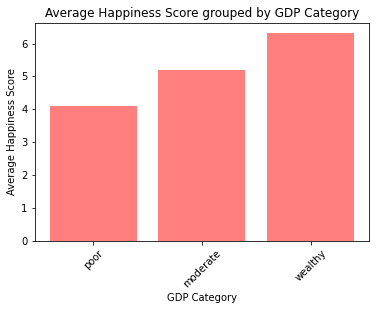

<Figure size 432x288 with 0 Axes>

In [16]:
# Chart happiness by GDP Category
x_axis=sorted_GDP_df["GDP_category"]
score_by_GDP = sorted_GDP_df["average_score"]
plt.bar(x_axis, score_by_GDP, color='r', alpha=0.5,align="center")

plt.title("Average Happiness Score grouped by GDP Category")
plt.xlabel("GDP Category")
plt.xticks(rotation=45)
plt.ylabel("Average Happiness Score")
plt.show()
plt.savefig("../images/happiness_by_GDP.png")

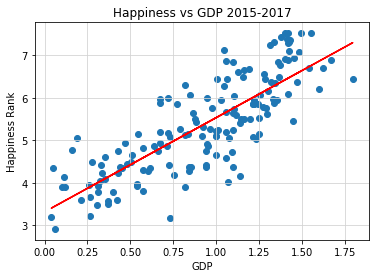

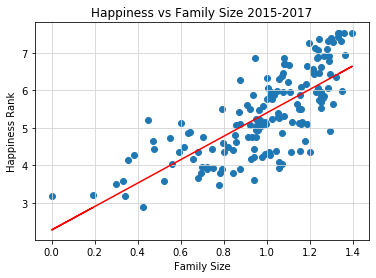

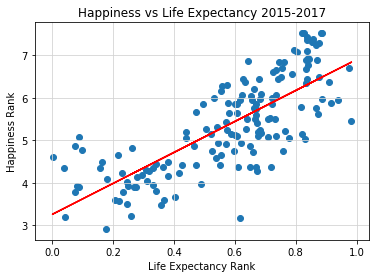

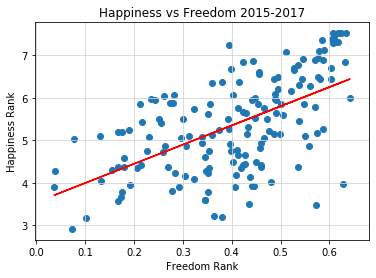

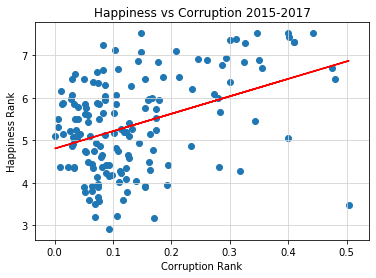

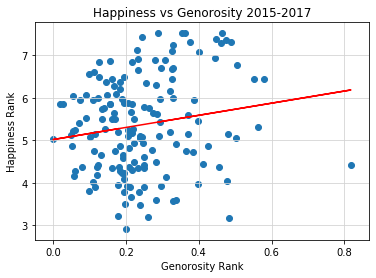

In [20]:
# Happiness Data Analysis - Scatter plots
# Function for scatter plot and linear regression
def regression(x_axis, y_axis, title, x_label, y_label):
    slope, y_int, r, pval, stderr = linregress(x_axis, y_axis)
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(b=True, which="major",axis="both", color="lightgrey")
    regression = slope * x_axis + y_int
    plt.plot(x_axis, regression, color = "red")
    plt.show()

# GDP vs. happiness
regression(happiness_summary_df["average_GDP"],happiness_summary_df["average_score"], "Happiness vs GDP 2015-2017", 
           "GDP", "Happiness Rank")

# Family vs. happiness
regression(happiness_summary_df["average_family"],happiness_summary_df["average_score"], "Happiness vs Family Size 2015-2017", 
           "Family Size", "Happiness Rank")

# Life Expectancy vs. happiness
regression(happiness_summary_df["average_life_expect"],happiness_summary_df["average_score"], "Happiness vs Life Expectancy 2015-2017", 
           "Life Expectancy Rank", "Happiness Rank")

# Life Freedom vs. happiness
regression(happiness_summary_df["average_freedom"],happiness_summary_df["average_score"], "Happiness vs Freedom 2015-2017", 
           "Freedom Rank", "Happiness Rank")

# Corruption vs. happiness
regression(happiness_summary_df["average_corruption"],happiness_summary_df["average_score"], "Happiness vs Corruption 2015-2017", 
           "Corruption Rank", "Happiness Rank")

# Genorosity vs. happiness
regression(happiness_summary_df["average_generosity"],happiness_summary_df["average_score"], "Happiness vs Genorosity 2015-2017", 
           "Genorosity Rank", "Happiness Rank")



In [25]:
# merge data frames to add country coordinates
coordinates_csv = "Resources/country_coordinates.csv"
coordinates_df = pd.read_csv(coordinates_csv)

merged_coordinates_df = pd.merge(happiness_1517_df, coordinates_df, how="inner", on=["Country"])

plotting_df = pd.DataFrame({"Country": merged_coordinates_df["Country"], "average_score": merged_coordinates_df["average_score"],
                           "Latitude": merged_coordinates_df["Latitude"],
                           "Longitude": merged_coordinates_df["Longitude"]})

plotting_df.head()

,Country,average_score,Latitude,Longitude
0,Switzerland,7.530000,46.818188,8.227512
1,Iceland,7.522000,64.963051,-19.020835
2,Denmark,7.525000,56.263920,9.501785
3,Norway,7.519000,60.472024,8.468946
4,Canada,7.382333,56.130366,-106.346771


In [38]:
gmaps.configure(g_key)
locations = plotting_df[["Latitude", "Longitude"]].astype(float)
scores = plotting_df["average_score"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=scores, 
                                 dissipating=False, max_intensity=8,
                                 point_radius = 5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))